# EMSC3033 - Week 7 Practical Solution
## The Geomagnetic Field and Monopole Anomalies

### Start by importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Questions

***Question A*** 

The Geoscience Australia Geomagnetic Observatory in Canberra has a
geographical position of 35.32$^\circ$ N and 149.36$^\circ$ E. During the day of
01/01/2021, the average X, Y, and Z components of the field were:

X = 23,065.84 nT,

Y = 5202.38 nT,

Z = -52,955.11 nT.

Calculate the inclination (I), and declination (D) for Canberra
on 01/01/2021.

Then compare the values you calculate to
those that would be produced at Canberra by a GAD field.

***Solution*** - This involves converting from a Cartesian to spherical coordinate systems. The relationships we need are given in Section 1.1.1. Specifically:

$B = \sqrt{X^2 + Y^2 + Z^2}$

$H = \sqrt{X^2 + Y^2}$

$I = \arctan(Z/H)$

$D = \arctan(Y/X)$

We'll use `numpy` to make this calculations. Remember that trigonometric functions in `numpy` use radians, but we can use the `rad2deg` function to convert to degrees.

In [41]:
X = 23065.85 # X component strength in nT
Y = 5202.38 # Y component strength in nT
Z = -52955.11 # Z component strength in nT

B = np.sqrt(X**2 + Y**2 + Z**2) #find B
H = np.sqrt(X**2 + Y**2) #find horizontal component of the field 
I = np.rad2deg(np.arctan(Z/H)) # find inclination in degrees

Finding the declination is a little more tricky because we have to ensure it resides in the correct quadrant. If we use `np.arctan`, we'll get an answer in the interval $[-\pi/2,\pi/2]$. However we know that the declination should be in the interval $[-\pi/2,\pi/2]$. To overcome this problem we use the `np.arctan2` function.

In [42]:
D = np.rad2deg(np.arctan2(Y,X)) # find inclination in degrees

We can now print the result to screen. We'll use the `np.around` function ensure that we work to an appropriate number of decimal places and include a statement of our units.

In [43]:
print("I = " + str(np.around(I,1)) + " degrees")
print("D = " + str(np.around(D,1)) + " degrees")

I = -65.9 degrees
D = 12.7 degrees


***Question B*** 

Based on Equation 11 create a plot of inclination against latitude at 2$^\circ$ intervals between 90$^\circ$~S and 90$^\circ$~N.

Equation 11 gives the expected inclination (I) for a given latitude ($\lambda$) under the assumption of a geocentric axial dipole field model:

$\tan I = 2 \tan \lambda$

First we create an array of latitudes at 2$^\circ$ intervals between 90$^\circ$~S and 90$^\circ$~N. To do this we can use the `np.arange` function, which we provide with a starting point (`-90`), a finishing point (`+90`) and an increment (`2`). For some reason, `np.arange` creates an interval including the start point but excluding the stop point. Therefore we need to increase the stop point by one increment to ensure the maximum value in our array is 90.

In [45]:
lat = np.arange(-90,92,2) 

We can now convert the latitudes to inclinations.

Remember that `numpy` works in radians so first we'll need to convert the latitudes to radians and then the calculated inclinations to degrees.

In [46]:
I = np.rad2deg(np.arctan(2.0 * np.tan(np.deg2rad(lat))))

We can now plot the result using `matplotlib`.

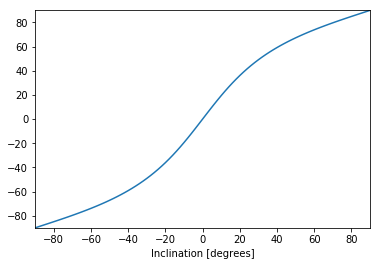

In [47]:
plt.plot(lat,I) #plot inclination against latitude
plt.xlim((-90,90)) #set X-axis limits
plt.ylim((-90,90)) #set Y-axis limits
plt.xlabel("Latitude [degrees]") # Add label to X-axis
plt.xlabel("Inclination [degrees]") # Add label to Y-axis
plt.show()

***Question C*** 

The following inclinations were measured on
01/01/2021 at observatories around the world. Add the data points
to the chart you made for the previous question. Why don't the observed inclinations
coincide exactly with the GAD curve?

| Name | Latitude | Longitude | Inclination |
| --- | --- | --- | --- |
| Scott Base | -77.8 | 166.8 | -80.21|
| McQuarie Island | -54.5 | 158.8 | -78.63|
| Port Alfred | -46.4 | 51.9 | -64.39|
| Hartbeesthoek | -25.9 | 27.7 | -63.01|
| Bangui | 4.3 | 18.6 | -16.25|
| Mbour | 14.4 | 343.0 | 8.56|
| Guimar | 28.3 | 343.6 | 40.03|
| San Pablo | 39.5 | 355.6 | 54.26|
| Wingst | 53.8 | 9.1 | 68.52|
| Qaanaaq | 77.5 | 290.7 | 85.97|

We can now create arrays containing the latitudes and inclinations from the observatories.

In [48]:
lat1 = np.array([-77.8,-54.5,-46.4,-25.9,4.3,14.4,28.3,39.5,53.8,77.5])
I1 = np.array([-80.21,-78.63,-64.39,-63.01,-16.25,8.56,40.03,54.26,68.52,85.97])

Now we recreate our earlier plot and add the observatory data as red circles

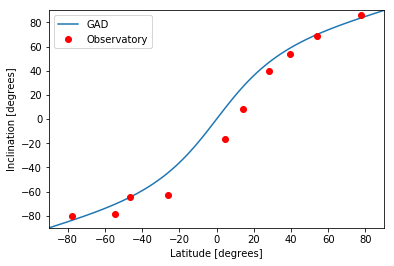

In [50]:
plt.plot(lat,I,label="GAD") #plot GAD inclination against latitude
plt.plot(lat1,I1,'or',label="Observatory") #plot observatory inclination against latitude
plt.xlim((-90,90)) #set X-axis limits
plt.ylim((-90,90)) #set Y-axis limits
plt.xlabel("Latitude [degrees]") # Add label to X-axis
plt.ylabel("Inclination [degrees]") # Add label to Y-axis
plt.legend() #add a legend
plt.show()

The reason the observatory data doesn't match exactly with the GAD model is non-dipole field sources. Such sources can be very important on a local scale, but tend to average out globally over a sufficiently long time period (about 10 thousand years).

## Part 2: Questions

***Question A*** 

Assuming that the Earth's magnetic field has a
strength of 50,000 nT, calculate the total ($\Delta B$), vertical ($\Delta Z$), and horizontal ($\Delta H$) anomalies for a monopole with a cross-sectional area of 0.5 m$^2$,
magnetic susceptibility ($\kappa$) of 0.1 (no units) and depth ($Z_p$) of 5 m.

Calculate the anomaly in 0.1 m steps from positions of $x$ = -15 m to
$x$ = +15 m and for field inclinations of +45$^o$. You can assume that $x$ is aligned with the horizontal direction of Earth's magnetic field.

First we need to calculate the moment of the pole, which according to equation 13 is given by:

$m = B*\kappa*A$


In [51]:
B = 50000E-9 #field strength in Tesla
kappa = 0.025 #magnetic susceptibility of monopole
A = 0.5 # Area of monopole
m = B*kappa*A #magnetic moment

Now we can use `np.arange` to create an array of positions along x (remember that we have to increase the stopping value).

In [52]:
x = np.arange(-15,15.1,0.1)

Now that we have $x$, we can also find the value of $r$ for each position along x. This simply involves Pythagoras theorem given $x$ and $Z_p$:

In [53]:
Zp = 5 #depth of the monopole in metres
r = np.sqrt(x**2 + Zp**2)

The equations for $\Delta B$, $\Delta Z$, and $\Delta H$ are given by:

$\Delta B = \frac{m}{r^3}(x \cos I - Z_p \sin I)$

$\Delta Z = -\frac{mZ_p}{r^3}$

$\Delta H = \frac{mx}{r^3}$

We also need to include the inclination ($I$), which `numpy` will expect in radians. 

In [54]:
I = np.deg2rad(45) #inclination in radians
Delta_B = mu0 / (4*np.pi) * m / r**3 * (x*np.cos(I)-Zp*np.sin(I))
Delta_Z = -mu0 / (4*np.pi) * m / r**3 * Zp
Delta_H = mu0 / (4*np.pi) * m / r**3 * x
Delta_B = m / r**3 * (x*np.cos(I)-Zp*np.sin(I))
Delta_Z = -m / r**3 * Zp
Delta_H = m / r**3 * x

We'll now plot the anomaly profiles in terms of nanoTesla (our calculation we performed in Tesla) with respect to position along $x$.

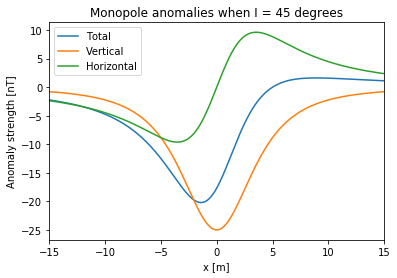

In [55]:
plt.plot(x,Delta_B*1E9,label="Total") #plot the total anomaly
plt.plot(x,Delta_Z*1E9,label="Vertical") #plot the vertical anomaly
plt.plot(x,Delta_H*1E9,label="Horizontal") #plot the horizontal anomaly
plt.xlim([-15,15]) #limit the x-axis range
plt.xlabel("x [m]") #label the x-axis
plt.ylabel("Anomaly strength [nT]") #label the y-axis
plt.legend() #add a legend
plt.title("Monopole anomalies when I = 45 degrees");

***Question A*** 

Repeat the calculation above, for inclinations of +90$^o$ and 0$^o$.

Repeating the analysis for different inclinations is simple. We modify `I` and recalculate the anomalies.

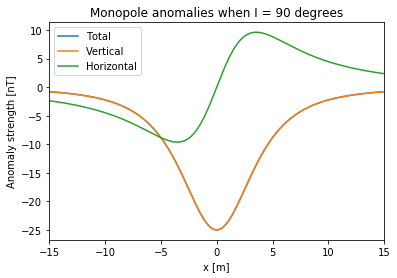

In [56]:
I = np.deg2rad(90) #inclination in radians
Delta_B = m / r**3 * (x*np.cos(I)-Zp*np.sin(I))
Delta_Z = -m / r**3 * Zp
Delta_H = m / r**3 * x

plt.plot(x,Delta_B*1E9,label="Total") #plot the total anomaly
plt.plot(x,Delta_Z*1E9,label="Vertical") #plot the vertical anomaly
plt.plot(x,Delta_H*1E9,label="Horizontal") #plot the horizontal anomaly
plt.xlim([-15,15]) #limit the x-axis range
plt.xlabel("x [m]") #label the x-axis
plt.ylabel("Anomaly strength [nT]") #label the y-axis
plt.legend() #add a legend
plt.title("Monopole anomalies when I = 90 degrees");

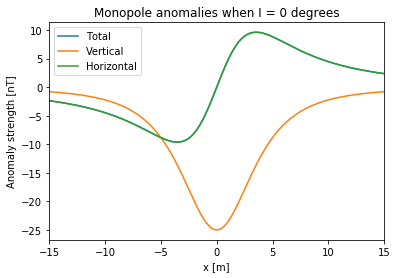

In [57]:
I = np.deg2rad(0) #inclination in radians
Delta_B = m / r**3 * (x*np.cos(I)-Zp*np.sin(I))
Delta_Z = -m / r**3 * Zp
Delta_H = m / r**3 * x

plt.plot(x,Delta_B*1E9,label="Total") #plot the total anomaly
plt.plot(x,Delta_Z*1E9,label="Vertical") #plot the vertical anomaly
plt.plot(x,Delta_H*1E9,label="Horizontal") #plot the horizontal anomaly
plt.xlim([-15,15]) #limit the x-axis range
plt.xlabel("x [m]") #label the x-axis
plt.ylabel("Anomaly strength [nT]") #label the y-axis
plt.legend() #add a legend
plt.title("Monopole anomalies when I = 0 degrees");

Note how the shape of the anomaly changes with inclination. When $I$ = 90$\circ$ the total anomaly is the same as $\Delta_V$ and when $I$ = 0$\circ$ the total anomaly is the same as $\Delta_H$.